# 5.1 Bond behavior governed by damage

 * Define a bond-slip law governed by damage and loading history using unloading.
 * What is different in comparison to elastic-plastic models?
 * For what materials is unloading to zero realistic?
 * Example of a CFRP behavior

In [6]:
%matplotlib widget
import matplotlib.pyplot as plt
import ibvpy.api as ib

## Construct the bond slip model

In [7]:
bs1 = ib.MATSBondSlipMultiLinear(s_data="0,0.1,0.2,0.8", tau_data="0,8,4,1")
bs1.interact()

In [5]:
bs1 = ib.MATSBondSlipMultiLinear()
bs1.sim.tline.step=0.0005
bs1

In [3]:
bs1.mats_eval.omega_fn_type = 'jirasek'
bs1.mats_eval

In [4]:
bs1.mats_eval.omega_fn.trait_set(s_f = 0.001, plot_max=0.05)
bs1.mats_eval.omega_fn

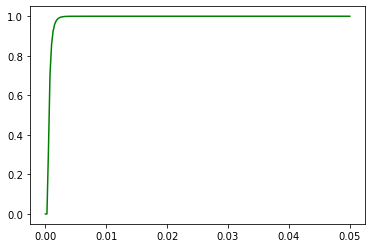

In [5]:
bs1.mats_eval.omega_fn.plot(plt.axes())

In [6]:
bs1.w_max = 0.0015
bs1.loading_scenario.trait_set(loading_type='cyclic',
                               amplitude_type='increasing',
                               loading_range='symmetric',
                               )
bs1.loading_scenario.trait_set(number_of_cycles=10,
                               maximum_loading=1,
                               unloading_ratio =0.0)


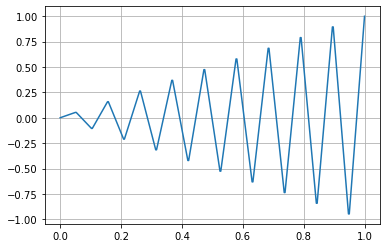

In [7]:
bs1.loading_scenario.plot(plt.axes())
plt.grid(True)

In [10]:
bs1.sim.run()

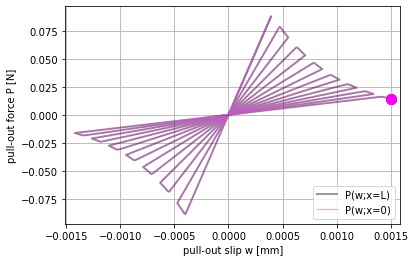

In [17]:
ax = plt.axes()
ax.grid(True)
bs1.hist.plot_Pw(ax,1)

### Evolution of the damage

In [18]:
bs2 = BondSlipModel(mats_eval_type='damage')
bs2.sim.tline.step = 0.0005
bs2

In [19]:
bs2.mats_eval.omega_fn_type = 'abaqus'
bs2.mats_eval

In [20]:
bs2.mats_eval.omega_fn

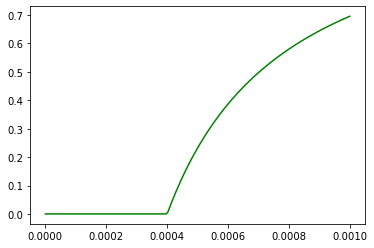

In [21]:
bs2.mats_eval.omega_fn.plot(plt.axes())

In [23]:
bs2.loading_scenario.trait_set(loading_type='cyclic',
                               amplitude_type='increasing',
                               loading_range='symmetric',
                               )
bs2.loading_scenario.trait_set(number_of_cycles=8,
                               maximum_loading=0.0025,
                               unloading_ratio =0.0)
bs2.sim.run()

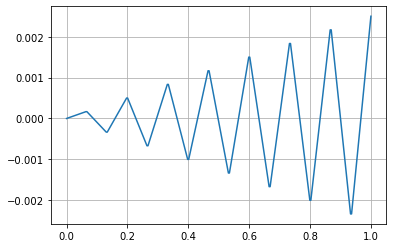

In [24]:
bs2.loading_scenario.plot(plt.axes())
plt.grid(True)

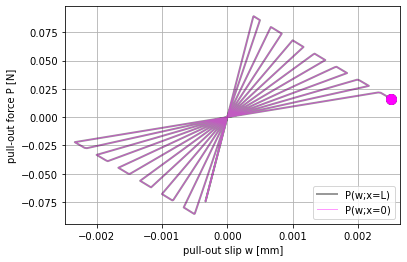

In [25]:
ax = plt.axes()
ax.grid(True)
bs2.hist.plot_Pw(ax,1)

## Tasks and Questions

### How to identify a damage function given an identified bond-slip curve experiment?

### Test the Abaqus damage function and the meaning of its parameters